<a href="https://colab.research.google.com/github/KamalRawalCS/NYC-Taxi-Trip-Time-Prediction-Project/blob/main/Copy_of_NYC_taxi_trip_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : NYC taxi trip time Prediction (Classification)**


**Project Type:** Classification

**Contribution:**- Individual

**Name:**- Kamal Rawal

### **GitHub Link - https://github.com/KamalRawalCS/NYC-Taxi-Trip-Time-Prediction-Project**

# **Project Summary**
Task is to build a model that predicts the total ride duration of taxi trips in New York City. Primary dataset is the one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

The primary goal of this project is to build a fundamental machine learning model that can forecast the typical trip time and cost for a given pickup location, dropoff location, date, and time. In order to gain an advantage over competitors and give customers greater value, every company today must effectively use its data. Making critical business decisions now often involves using machine learning, and libraries like data prep and sklearn make it possible for anyone, regardless of coding proficiency or domain expertise, to create models. One of the most potent libraries for machine learning is called Scikit Learn.

## **STEP 1 - Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from datetime import datetime
import datetime
! pip install klib
import klib
import warnings
warnings.filterwarnings("ignore")

## **STEP 2 - Import and taking overview of the data.**

In [2]:
# lets take a look at the data set
taxi_df=pd.read_csv('NYC Taxi Data.csv')
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# **Column Details**


*   **Id**: A unique identifier for each trip
*   **Vendor Id**: A unique identifier for each trip

*   **Pickup Datetime**: A unique identifier for each trip
*   **Dropoff Datetime**: A unique identifier for each trip

*   **Passenger Count**: The number of passengers in the vehicle (driver entered value)
*   **Pickup Longitude**: The number of passengers in the vehicle (driver entered value)

*   **Pickup Latitude**: The latitude where the meter was engaged
*   **Dropoff Longitude**: The longitude where the meter was disengaged

*   **Dropoff Latitude**: The latitude where the meter was disengaged

*   **Store and Fwd Flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
*   **Trip Duration**: Duration of time in seconds
















In [3]:
# Determining shape of the dataset
rows=taxi_df.shape[0]
columns=taxi_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 1458644
Number of columns in dataset are 11


In [4]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
# Numeric features decription
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## **STEP 3 - Checking for presence of null values.**

In [6]:
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=taxi_df.columns)
  values['Null Count']= taxi_df.isnull().sum()
  values['Dtype']=taxi_df.dtypes
  values['unique_count']= taxi_df.nunique()
  return values

In [7]:
brief()

,Null Count,Dtype,unique_count
id,0,object,1458644
vendor_id,0,int64,2
pickup_datetime,0,object,1380222
dropoff_datetime,0,object,1380377
passenger_count,0,int64,10
pickup_longitude,0,float64,23047
pickup_latitude,0,float64,45245
dropoff_longitude,0,float64,33821
dropoff_latitude,0,float64,62519
store_and_fwd_flag,0,object,2


### As we can see that we do not have any null values in the dataset, therefore we can move forward with the dataset...

## **STEP 4 - Preprocessing and feature engineering.**

### In the given dataset pickup_datetime and dropoff_datetime are not in proper  date time format and we need to convert them into datetime format.

We can see that in order to fully comprehend the problem statement's real-world scenario, we will need more data from our data. For example, it is impossible for us to track the preferences and patterns of taxi service users, such as the average amount of time and day of the week that they use the service.
We lack information about taxi journeys broken down by month.
We also lack information broken down by week and day of week.

Additionally, we lack information that would allow us to determine the peak times of day when cab services are most in demand.
The distance between the locations of the taxi journeys' pickup and drop-off are likewise unavailable.

In [8]:
# Converting timestamp to datetime format
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
# Creating pickup and dropoff months
taxi_df['pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month'] = taxi_df['dropoff_datetime'].dt.month

In [10]:
# Creating pickup and dropoff weekdays
taxi_df['pickup_weekday'] = taxi_df['pickup_datetime'].dt.weekday
taxi_df['dropoff_weekday'] = taxi_df['dropoff_datetime'].dt.weekday

In [11]:
# Creating pickup and dropoff hours
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour

In [12]:
# Creating pickup and dropoff minutes
taxi_df['pickup_minute'] = taxi_df['pickup_datetime'].dt.minute
taxi_df['dropoff_minute'] = taxi_df['dropoff_datetime'].dt.minute

In [13]:
# Creating pickup and dropoff day
taxi_df['pickup_day'] = taxi_df['pickup_datetime'].dt.day
taxi_df['dropoff_day'] = taxi_df['dropoff_datetime'].dt.day

## Creating new column distance for further analysis

In [14]:
# Creating the function for calculating distance between pickup and dropoff
from geopy.distance import geodesic
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return geodesic(start_coordinates,stop_coordinates).km

In [15]:
# Applying the function to our dataset and creating the feature ‘distance’.
taxi_df['distance'] = taxi_df.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [16]:
# Converting trip duration into hours
taxi_df['trip_duration_hour']=taxi_df['trip_duration']/3600

## Lets take view of our data with new column.

In [17]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_day,dropoff_day,distance,trip_duration_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,17,17,24,32,14,14,1.502172,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,43,54,12,12,1.808660,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,35,10,19,19,6.379687,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,2,19,19,32,39,6,6,1.483632,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,5,13,13,30,38,26,26,1.187038,0.120833


## **STEP 5 - Exploratory data analysis**

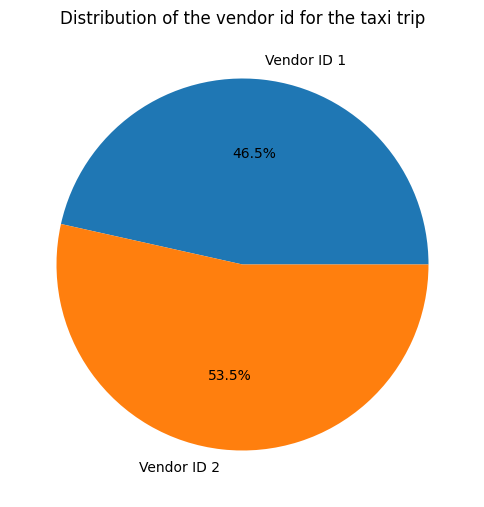

In [18]:
# Distribution of the vendor id for the taxi trip
(taxi_df['vendor_id'].value_counts() / taxi_df['vendor_id'].count()) * 100

# Percentage For Vendor_id Column
v1_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 1])/len(taxi_df)*100)
v2_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 2])/len(taxi_df)*100)
total_pctg = [v1_pctg, v2_pctg]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(total_pctg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%')
plt.title('Distribution of the vendor id for the taxi trip')
plt.show()

### Inference - We can observe that vendor 2 has a higher number of bookings (54%).

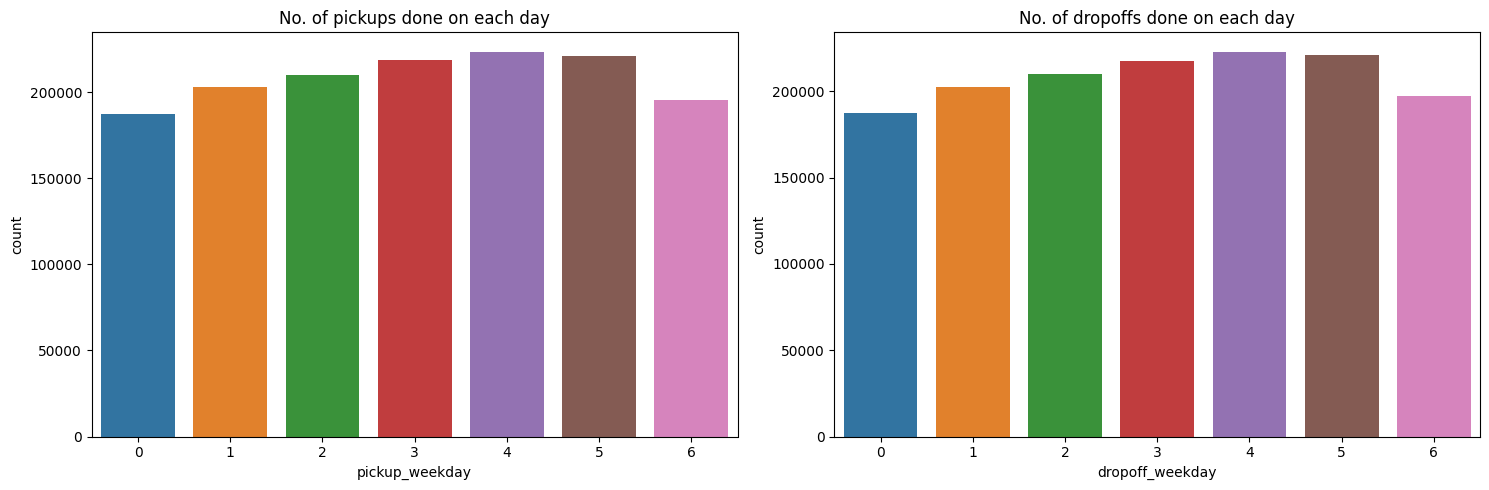

In [23]:
# Distribution of pickups and dropoffs on daily basis
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='pickup_weekday', data = taxi_df, ax=ax[0])
ax[0].set_title('No. of pickups done on each day')

sns.countplot(x='dropoff_weekday', data = taxi_df, ax=ax[1])
ax[1].set_title('No. of dropoffs done on each day')

plt.tight_layout()

### Inference - Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.
### We can see that compared to other days, taxi booking rates are higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

In [24]:
# Value count for each Month for pickup and dropoff
print('Pickup Month value counts')
taxi_df['pickup_month'].value_counts().sort_index()

print('Dropoff Month value counts')
taxi_df['dropoff_month'].value_counts().sort_index()

Pickup Month value counts
Dropoff Month value counts


1    229656
2    238292
3    256135
4    251636
5    248555
6    234243
7       127
Name: dropoff_month, dtype: int64

### We will subtract starting day from ending day and divide total datetime and convert the time difference into months

In [25]:
# Pickup data
total_pickup_datetime = taxi_df['pickup_datetime'].max() - taxi_df['pickup_datetime'].min()
total_pickup_datetime = total_pickup_datetime / np.timedelta64(1, 'M')
print('Total pickup datetime:',round(total_pickup_datetime,1))

# Dropoff data
total_dropoff_datetime = taxi_df['dropoff_datetime'].max() - taxi_df['dropoff_datetime'].min()
total_dropoff_datetime = total_dropoff_datetime / np.timedelta64(1, 'M')
print('Total dropoff datetime:',round(total_dropoff_datetime,1))

Total pickup datetime: 6.0
Total dropoff datetime: 6.0


## We can see that the entire amount of data is close to six months, which explains why our month values only include six months.

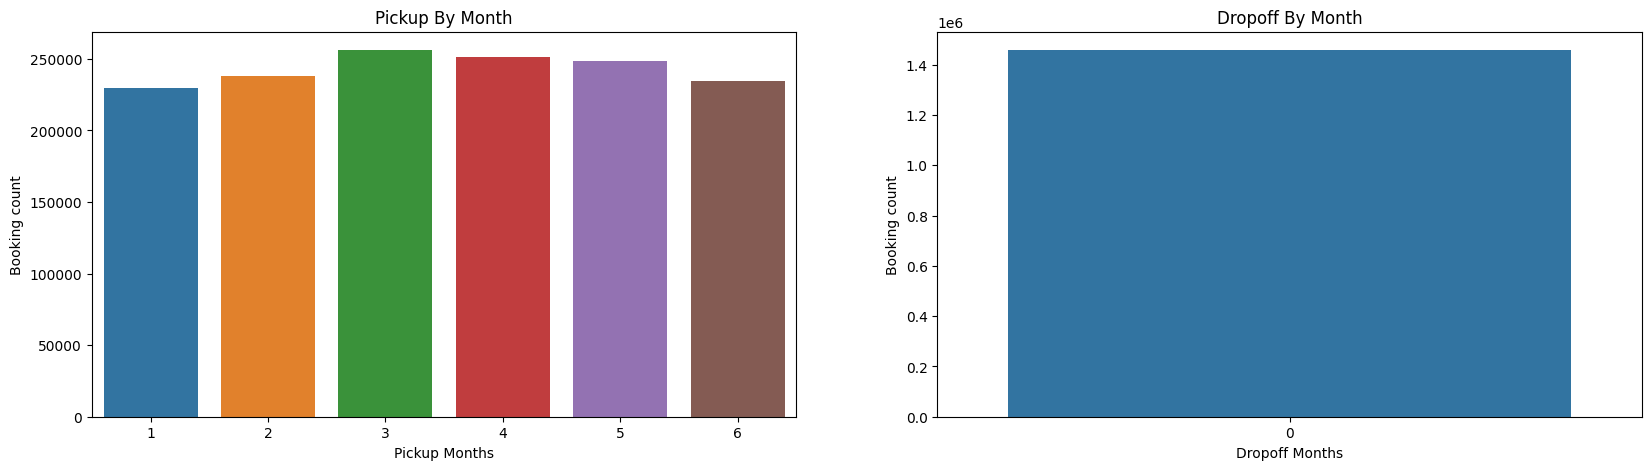

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
# Pickup by month count
ax1.set_title('Pickup By Month')
ax = sns.countplot(x = 'pickup_month', data = taxi_df, ax = ax1)
ax.set_xlabel('Pickup Months')
ax.set_ylabel('Booking count')

# Droppoff by month count
ax = sns.countplot(taxi_df['dropoff_month'],ax = ax2)
ax2.set_title('Dropoff By Month')
ax.set_xlabel('Dropoff Months')
ax.set_ylabel('Booking count')
plt.show()

### Inference - As we can see, more taxi reservations occurred in the months of March and April.

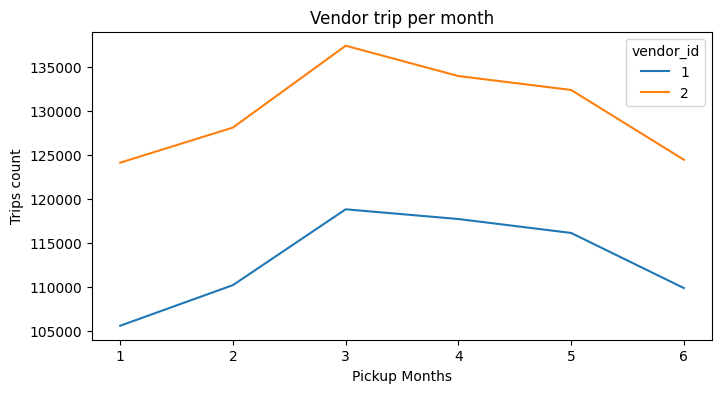

In [27]:
# Monthly trend for each vendor
monthly_pickup_vendor = taxi_df.groupby(['pickup_month', 'vendor_id']).size()
monthly_pickup_vendor = monthly_pickup_vendor.unstack()

monthly_pickup_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')

plt.show()

### Inference - We can see that both vendors' trips are at their maximum in the month of March and their lowest in  the month of January, February, and after June.

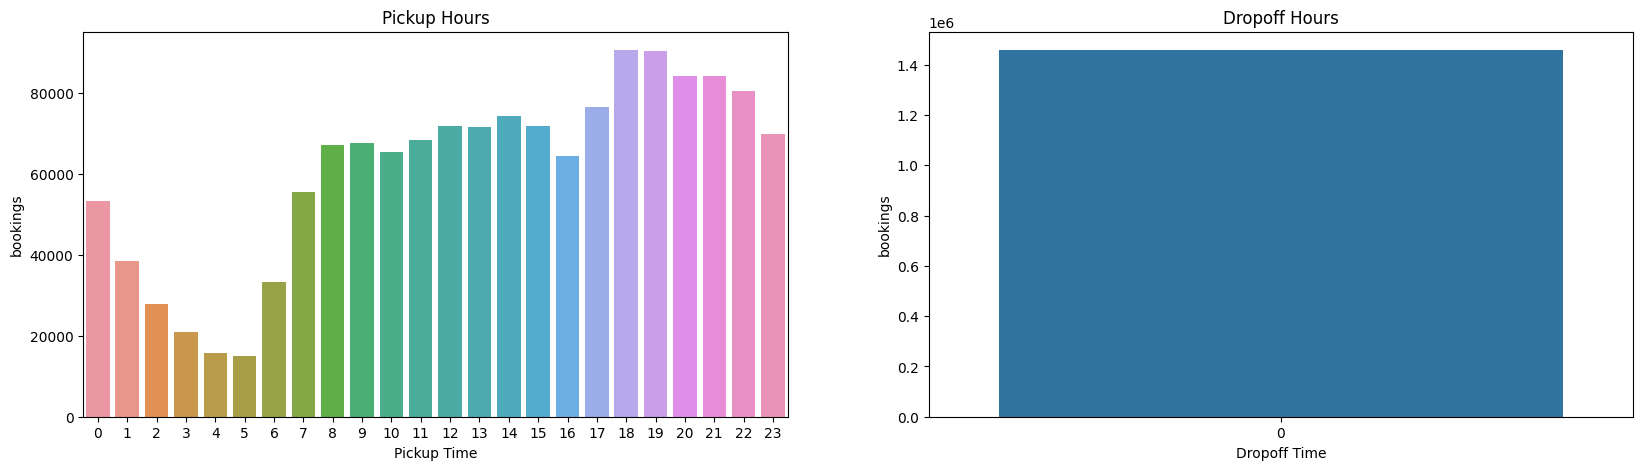

In [28]:
# Distribution of pickup and dropoff hours
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
# Pickup data
ax1.set_title('Pickup Hours')
ax = sns.countplot(x = 'pickup_hour', data = taxi_df, ax = ax1)
ax.set_xlabel('Pickup Time')
ax.set_ylabel('bookings')

# Dropoff data
ax = sns.countplot(taxi_df['dropoff_hour'],ax = ax2)
ax2.set_title('Dropoff Hours')
ax.set_xlabel('Dropoff Time')
ax.set_ylabel('bookings')

plt.show()

### Inference - Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening( x axis represesnts time in hrs, and peak is >15hr). We can see that people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

Text(0.5, 1.0, 'Distribution of passenger count')

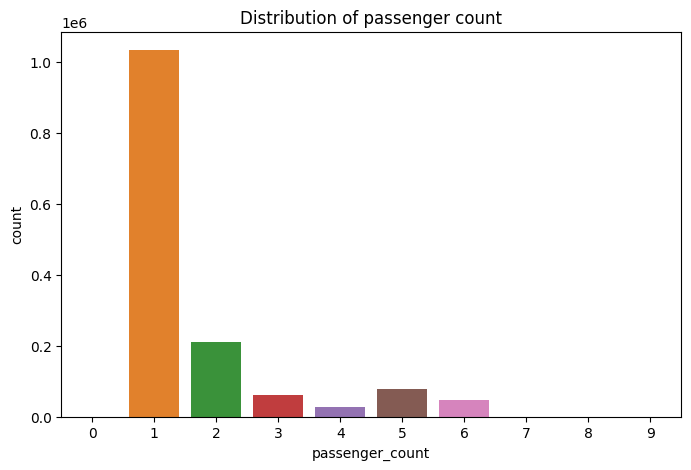

In [29]:
# Distribution of passenger count
plt.figure(figsize=(8,5))
ax=sns.countplot(x=taxi_df['passenger_count'])
plt.title('Distribution of passenger count')

### Inference - We can notice that most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo

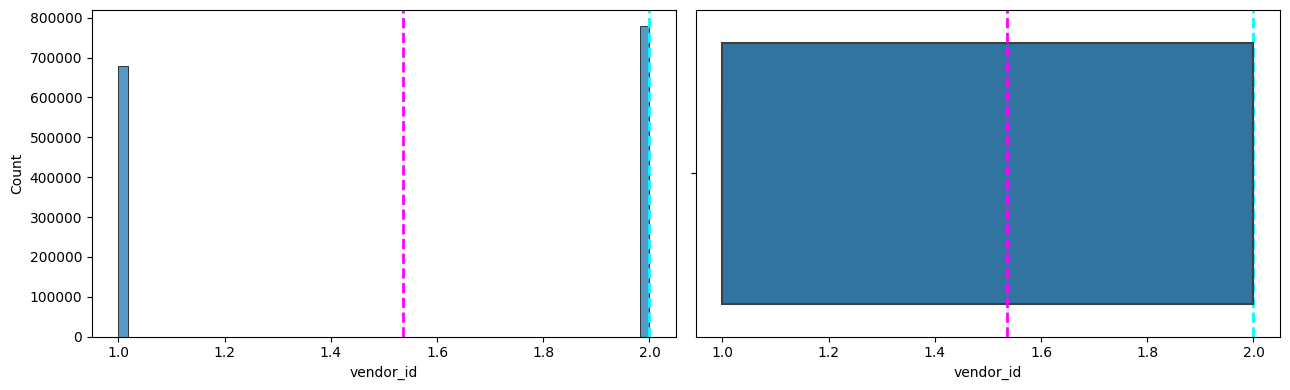

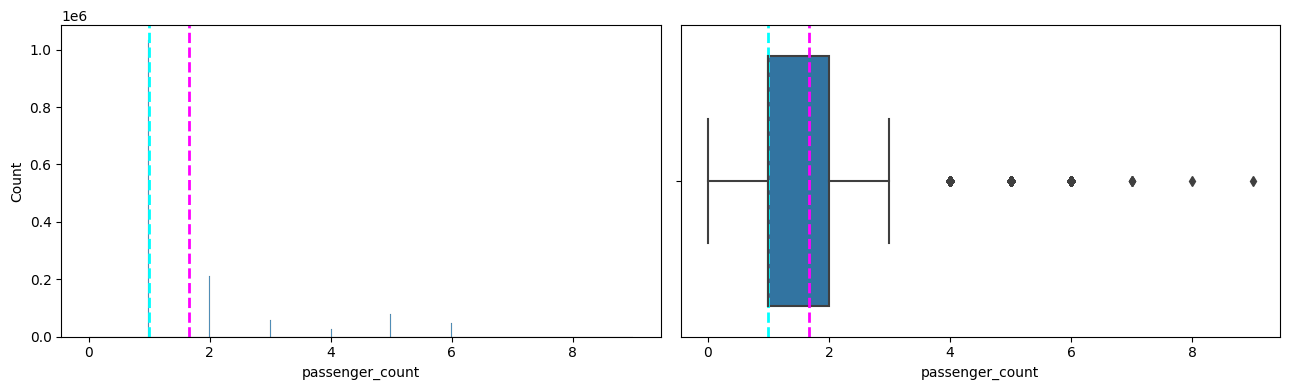

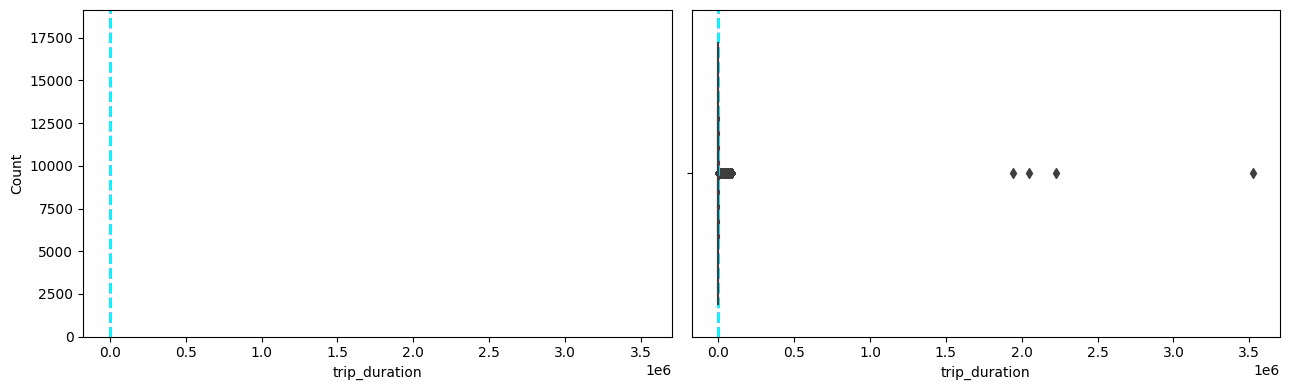

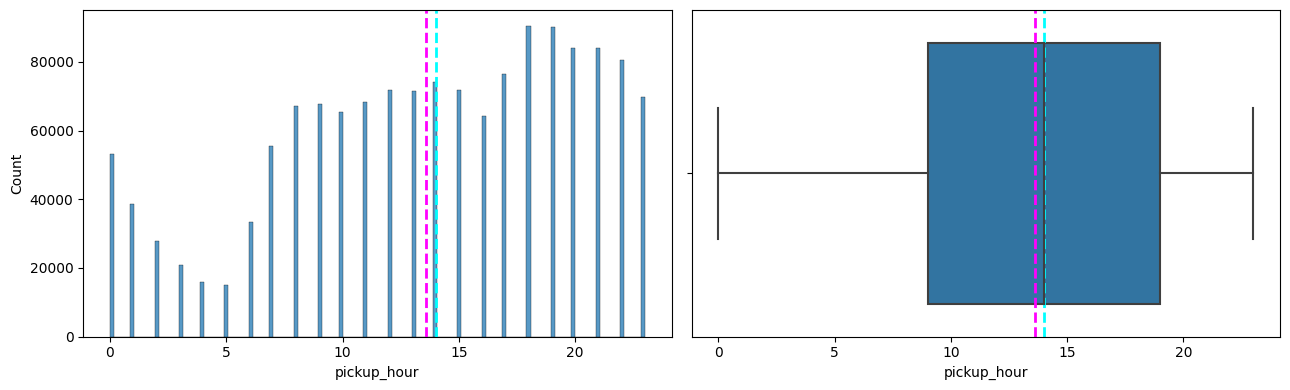

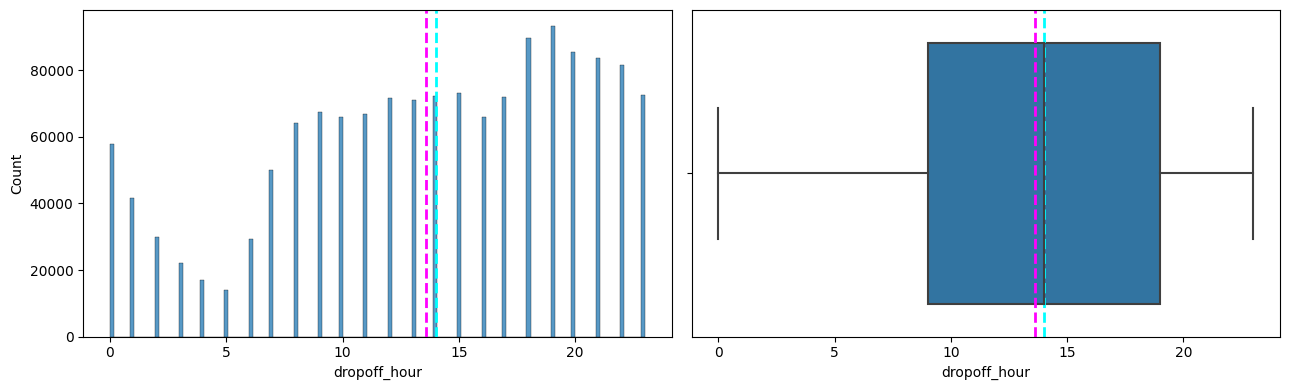

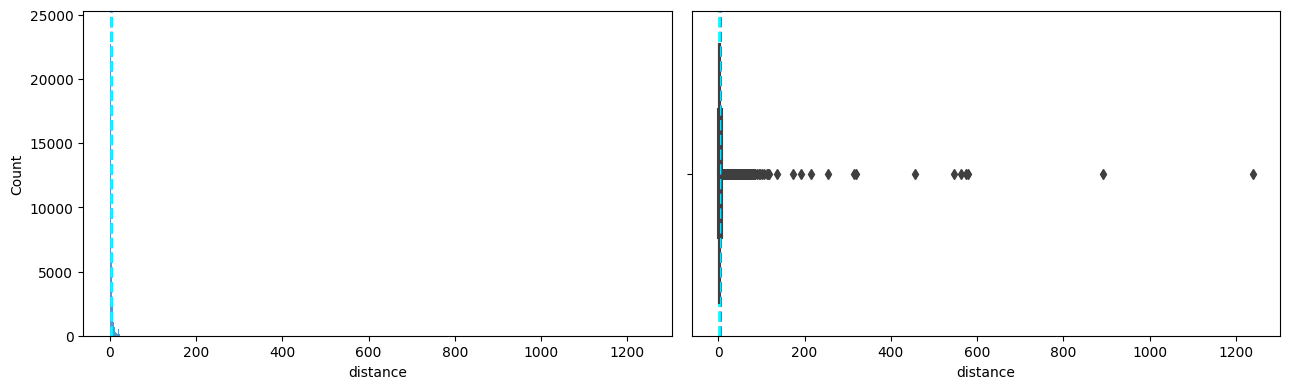

In [30]:
# Histplots and boxplots to determine distribution the data given below
numeric_features = ['vendor_id', 'passenger_count', 'trip_duration', 'pickup_hour', 'dropoff_hour','distance']
numeric_features

for col in numeric_features:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
  sns.histplot(data=taxi_df, x=col, ax=ax[0])
  ax[0].axvline(taxi_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(taxi_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=taxi_df, x=col, ax=ax[1])
  ax[1].axvline(taxi_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(taxi_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

### Inference -

 *  ### (histplot) distance and trip_duration graphs are highly skewed.
 *  ### (boxplot) distance and trip_duration columns have a lot outliers as well




## **STEP 6 - Multicollinearity and correlation check**

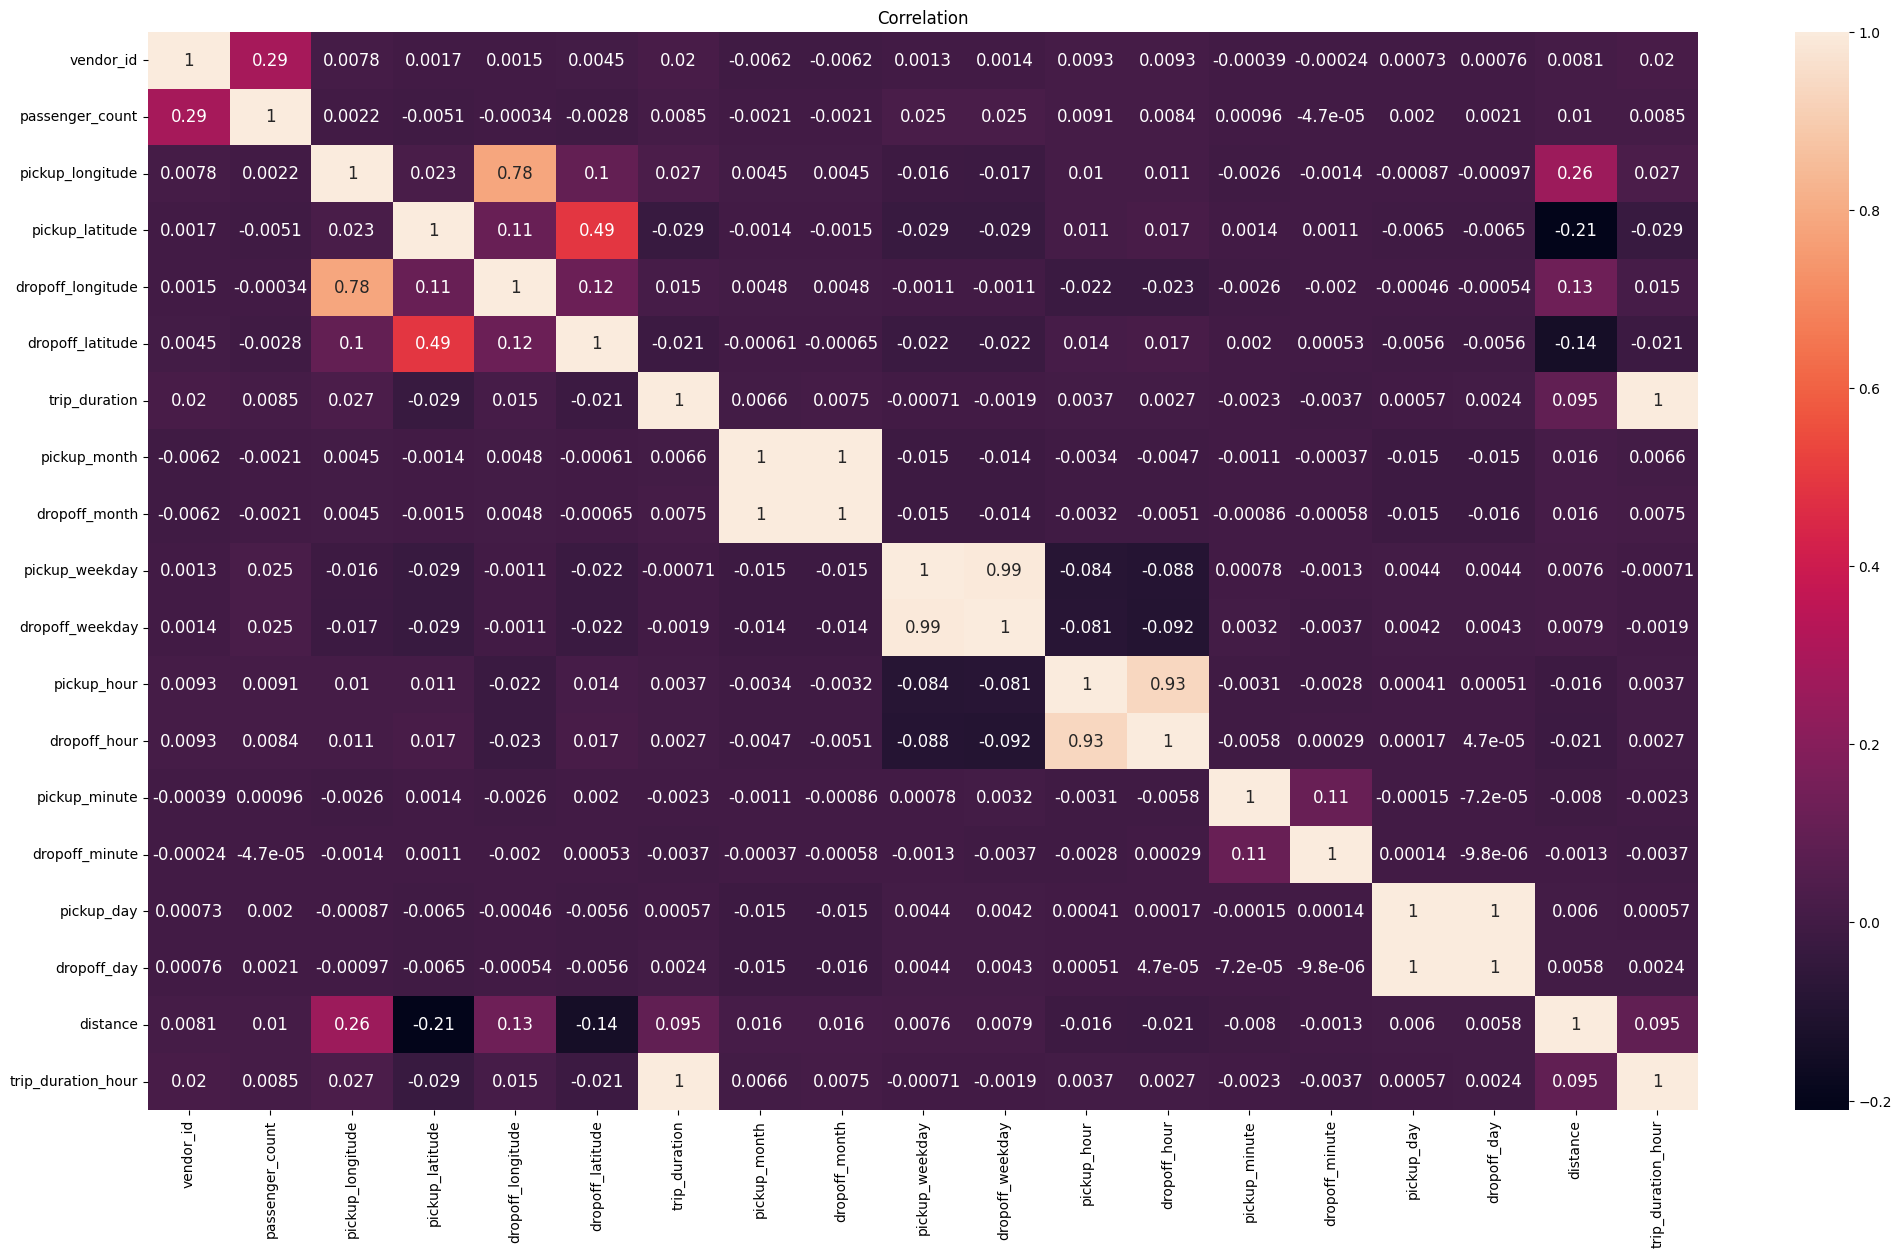

In [31]:
# Determining Correlation
plt.figure(figsize=(25,14))
correlation = taxi_df.corr()
sns.heatmap(correlation, annot=True, annot_kws={"size":12})
plt.title("Correlation")
plt.show()

### Inference - Above heatmap clearly shows that  'dropoff_day', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday' are highly correlated.

In [32]:
# This function returns highly correlated columns w.r.t given threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
# Calling the finction with threshold value 0.90

high_corr_features = correlation(taxi_df, 0.90)
print('Number of correlated features :',len(set(high_corr_features))) # getting the number of correlated features

Number of correlated features : 5


In [34]:
high_corr_features

{'dropoff_day',
 'dropoff_hour',
 'dropoff_month',
 'dropoff_weekday',
 'trip_duration_hour'}

### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [36]:
calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['trip_duration_hour', 'trip_duration']]])

,variables,VIF
0,vendor_id,1.141995e+01
1,passenger_count,2.841012e+00
2,pickup_longitude,2.933240e+06
3,pickup_latitude,1.682321e+06
4,dropoff_longitude,2.736948e+06
5,dropoff_latitude,1.477376e+06
6,pickup_month,3.572189e+06
7,dropoff_month,3.572873e+06
8,pickup_weekday,2.868816e+02
9,dropoff_weekday,2.871991e+02


### Inference - We know that acceptable range of VIF is <5, pickup day and dropoff day have values around 8 so we need to remove one of them.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

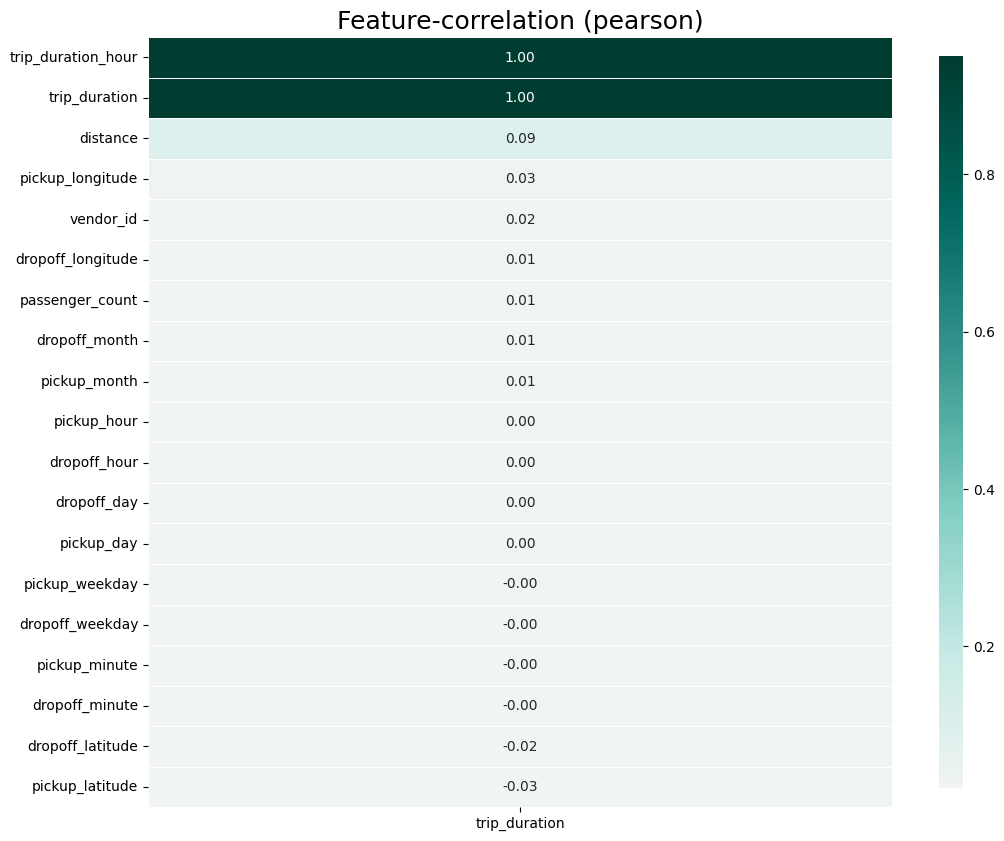

In [37]:
#correlation graph dependent and independent features
klib.corr_plot(taxi_df, target=taxi_df['trip_duration'])

## **STEP 7 - Processing outliers and checking distribution**

## Checking skewness of the dependent variable

<Axes: xlabel='trip_duration', ylabel='Density'>

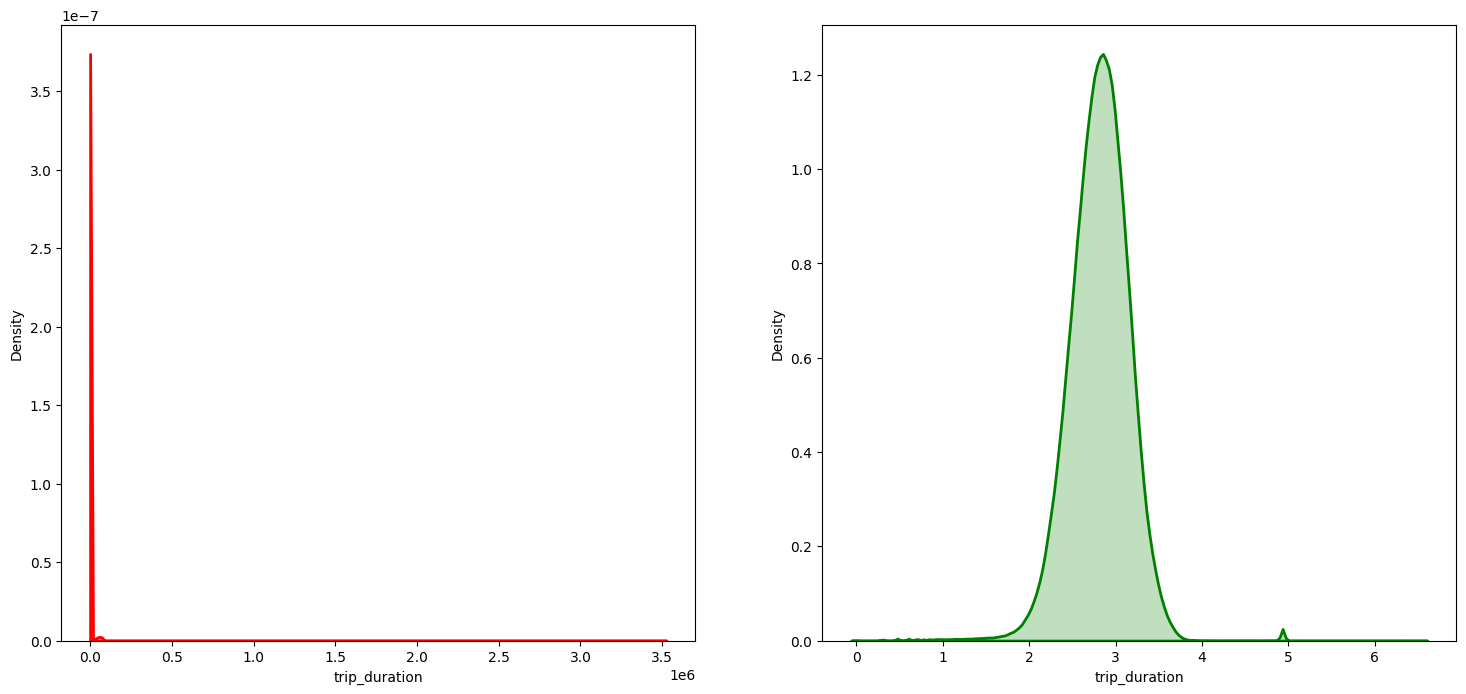

In [38]:
fig,ax=plt.subplots(1,2, figsize=(18,8))
sns.distplot(taxi_df.trip_duration, hist= False, kde= True, kde_kws= {'shade':True, 'linewidth':2}, label= 'non_normal', color='red', ax=ax[0])
sns.distplot(np.log10(taxi_df['trip_duration']), hist= False, kde= True, kde_kws={'shade':True, 'linewidth':2}, label='normal', color='green',ax=ax[1])

### Inference - Graph is positivley skewed so it needs to be regularized... we used log transformation to convert this into normal distribution

### **Outlier Removal (Quartile Method)**
### Interquartile range measures the spread of the middle half of our data.
### Formula: Q3 - Q1
### where Q1- quartile 1 and Q3- quartile 3

### lower limit of the data is given by Q1-1.5*IQR
### upper limit of the data is given by Q3+1.5*IQR

<Axes: >

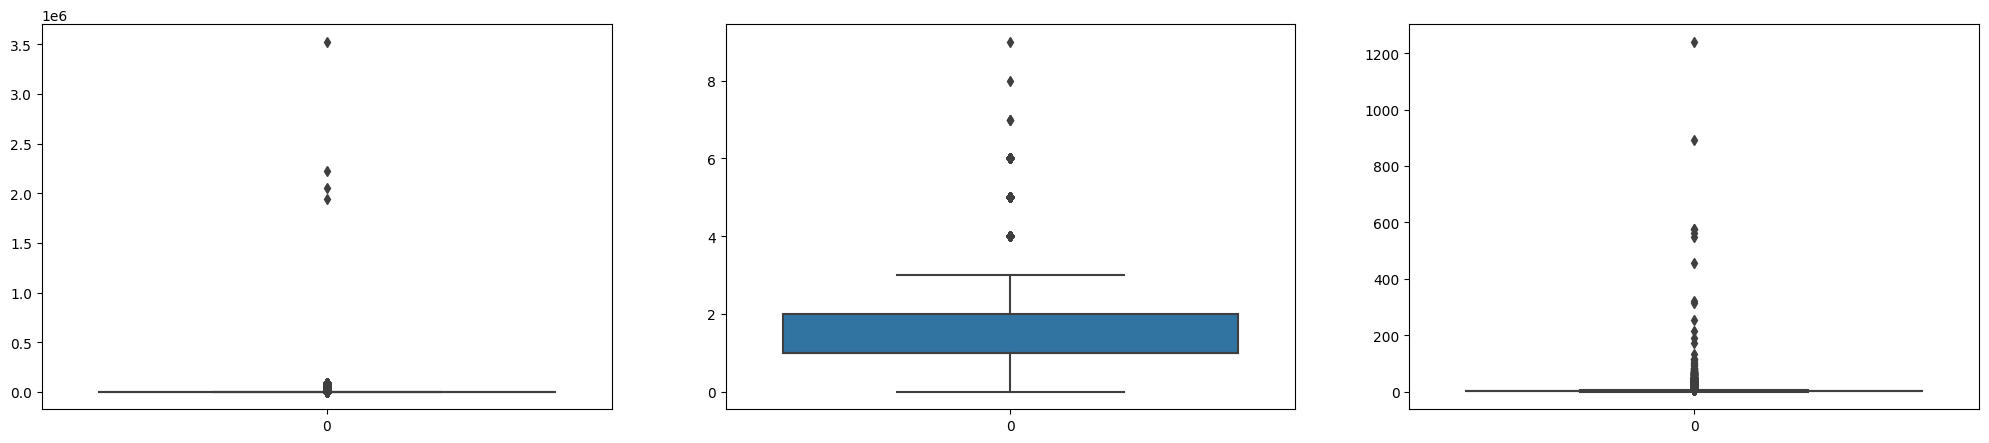

In [39]:
# Box plot for visualizing outliers
figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
sns.boxplot(taxi_df['trip_duration'], ax=ax[0])
sns.boxplot(taxi_df['passenger_count'], ax=ax[1])
sns.boxplot(taxi_df['distance'], ax=ax[2])

In [40]:
# Assigning different quarters to distance column
distance_Q1=np.percentile(taxi_df['distance'], 25)
print(distance_Q1)
distance_Q2=np.percentile(taxi_df['distance'], 50)
print(distance_Q2)
distance_Q3=np.percentile(taxi_df['distance'], 75)
print(distance_Q3)

1.2322648420811506
2.094045136249137
3.874716393714131


In [41]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("distance_lower_limit:", distance_lower_limit)
print("distance_upper_limit:", distance_upper_limit)

distance_lower_limit: -2.7314124853683204
distance_upper_limit: 7.838393721163602


In [42]:
# Removing outliers
taxi_df=taxi_df[taxi_df['distance']>distance_lower_limit]
taxi_df=taxi_df[taxi_df['distance']<distance_upper_limit]

In [44]:
# new shape of the dataset
taxi_df.shape

(1317869, 23)

In [45]:
# Assigning different quarters to trip duration column
trip_duration_Q1=np.percentile(taxi_df['trip_duration'], 25)
print(trip_duration_Q1)
trip_duration_Q2=np.percentile(taxi_df['trip_duration'], 50)
print(trip_duration_Q2)
trip_duration_Q3=np.percentile(taxi_df['trip_duration'], 75)
print(trip_duration_Q3)

373.0
605.0
931.0


In [46]:
# Calculating IQR
IQR= trip_duration_Q3 - trip_duration_Q1
trip_duration_lower_limit=trip_duration_Q1 - 1.5*IQR
trip_duration_upper_limit=trip_duration_Q3 + 1.5*IQR
print("trip_duration_lower_limit:", trip_duration_lower_limit)
print("trip_duration_upper_limit:", trip_duration_upper_limit)

trip_duration_lower_limit: -464.0
trip_duration_upper_limit: 1768.0


In [47]:
# Removing outliers
taxi_df=taxi_df[taxi_df['trip_duration']>0]
taxi_df=taxi_df[taxi_df['trip_duration']<trip_duration_upper_limit]

In [48]:
# new shape of the dataset
taxi_df.shape

(1277331, 23)

In [49]:
# Assigning different quarters to trip duration column
passenger_count_Q1=np.percentile(taxi_df['passenger_count'], 25)
print(passenger_count_Q1)
passenger_count_Q2=np.percentile(taxi_df['passenger_count'], 50)
print(passenger_count_Q2)
passenger_count_Q3=np.percentile(taxi_df['passenger_count'], 75)
print(passenger_count_Q3)

1.0
1.0
2.0


In [50]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("passenger_count_lower_limit:", passenger_count_lower_limit)
print("passenger_count_upper_limit:", passenger_count_upper_limit)

passenger_count_lower_limit: -0.5
passenger_count_upper_limit: 3.5


In [51]:
# Removing outliers
taxi_df=taxi_df[taxi_df['passenger_count']>0]
taxi_df=taxi_df[taxi_df['passenger_count']<passenger_count_upper_limit]

In [52]:
# new shape of the dataset
taxi_df.shape

(1142546, 23)

<Axes: xlabel='trip_duration', ylabel='Density'>

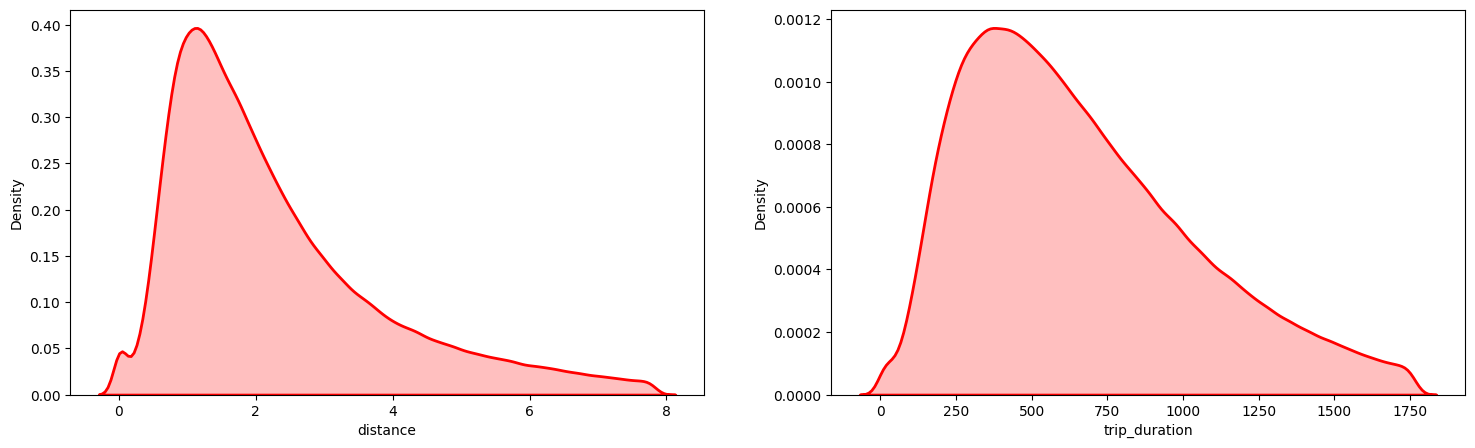

In [53]:
# Earlier we saw that distance and tripduration had highly skewed graph... lets check the distribution again
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
sns.distplot(taxi_df['distance'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="red", ax=ax[0])
sns.distplot(taxi_df['trip_duration'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="red", ax=ax[1])

### Inference - It seems both the columns now follow near to normal distribution

## **STEP 8 - Supervised Machine Learning of NYC taxi trip time**

### Since we have textual data in our dataset which might create problems during model prediction, therefore we need to convert this textual data into dummy variables

In [54]:
# Converting into dummy variables
taxi_df=pd.get_dummies(taxi_df, columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'])

In [55]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_weekday_4,pickup_weekday_5,pickup_weekday_6,dropoff_weekday_0,dropoff_weekday_1,dropoff_weekday_2,dropoff_weekday_3,dropoff_weekday_4,dropoff_weekday_5,dropoff_weekday_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,1,0,0,0,0,0,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,1,0,0,0,0,0,0,1,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,...,0,1,0,0,0,0,0,0,1,0


## Instead of dropping irrelevant or collinear columns we will be creating a separate list containg only those variables that are important and are not collinear
### (dropoff_day', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday', 'trip_duration_hour are highly correlated according to the heatmap and pickup_day and dropoff day has maximum vif, therefore we will not be considering these values.)

In [56]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',  'store_and_fwd_flag_N',  'store_and_fwd_flag_Y', 'pickup_weekday_0', 'pickup_weekday_1',
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6']

In [57]:
final_df=taxi_df[features]

## Evaluating which model is better. Therefore we will be calculating evaluation metrics for different models

In [58]:
from matplotlib import legend
# Defining a function to calculate evaluation metrics
def EM(x_train,y_train,y_predicted,disp="on"):
  ''' Takes different set of parameters and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=y_train,y_pred=y_predicted),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=y_train,y_pred=y_predicted))
  Adjusted_R2=(1-(1-r2_score(y_train, y_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
  if disp=="on":
    print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
    print("R2 Score :",R2,"Adjusted R2 Score :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100])
  plt.plot((np.array(y_train)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')



  return (MSE,RMSE,R2,Adjusted_R2)

In [59]:
#For Standarization  apply z-score
from scipy.stats import zscore

#Train test split
x = final_df[features].apply(zscore)[:100000]
y=taxi_df['trip_duration_hour'][:100000]

# Importing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## **Model 1 - Linear Regression**

In [60]:
# Instantiate Linear Regression objects
regression = LinearRegression()
regression.fit(x_train, y_train)
regression.score(x_train, y_train)

y_pred_train = regression.predict(x_train)

y_pred_test = regression.predict(x_test)

Mean Squared Error: 0.0056 Root Mean Squared Error: 0.07483314773547883
R2 Score : 0.49281346684528105 Adjusted R2 Score : 0.4927120079786409


(0.0056, 0.07483314773547883, 0.49281346684528105, 0.4927120079786409)

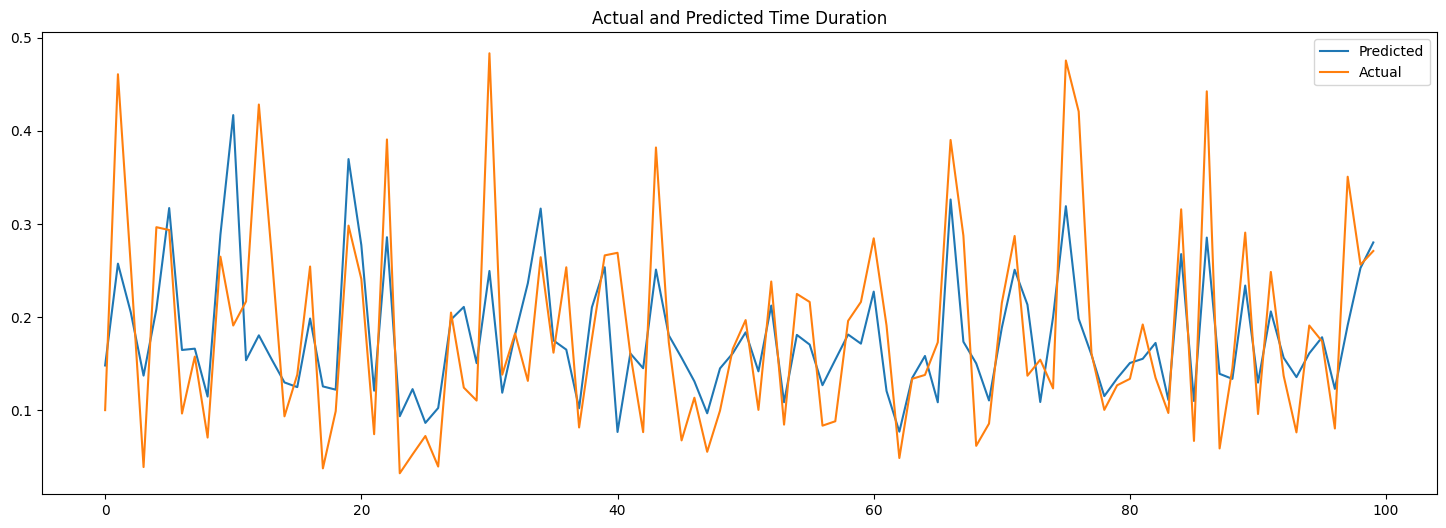

In [61]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_train)

Mean Squared Error: 0.0055 Root Mean Squared Error: 0.07416198487095663
R2 Score : 0.4947690526368045 Adjusted R2 Score : 0.49436452402959785


(0.0055, 0.07416198487095663, 0.4947690526368045, 0.49436452402959785)

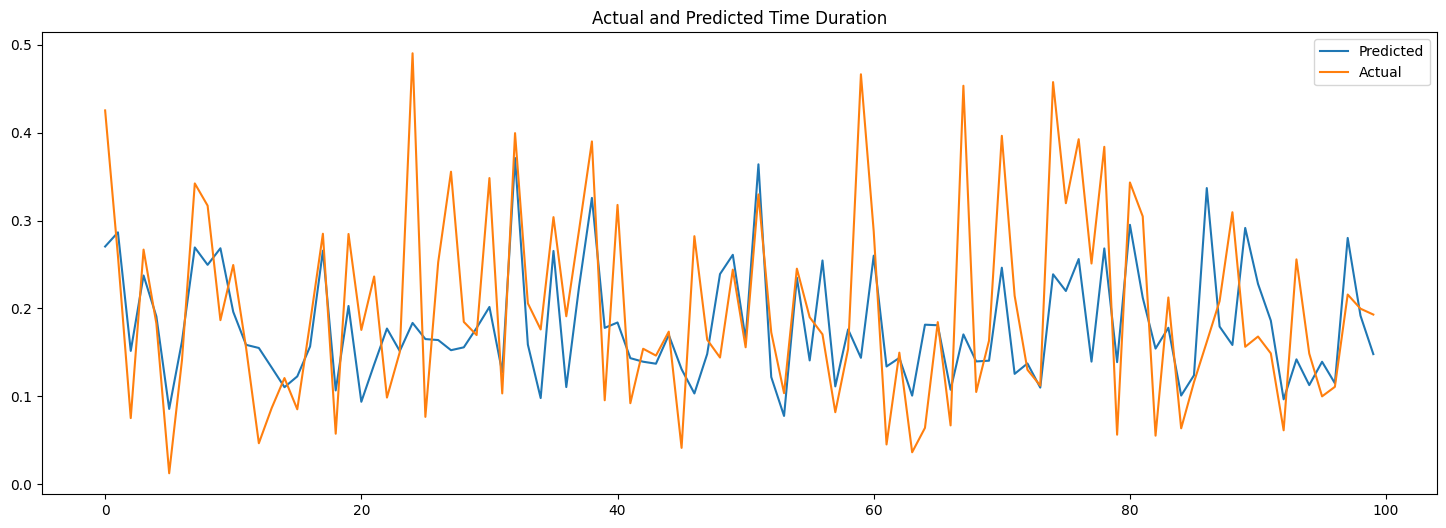

In [62]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_pred_test)

### As we can see that R2 score is very less and MSE is pretty high which means this algorithm is not suitable for our model

## **Model 2 - Decision Tree**

In [63]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
decision_tree_model = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=decision_tree_model,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')

decision_tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.2s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [64]:
decision_tree_grid.best_score_

0.54807127072848

In [65]:
decision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=10)

In [66]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_

y_pred_decision_tree_test=decision_tree_optimal_model.predict(x_test)
y_pred_decision_tree_train=decision_tree_optimal_model.predict(x_train)
y_pred_decision_tree_test=decision_tree_optimal_model.predict(x_test)
y_pred_decision_tree_train=decision_tree_optimal_model.predict(x_train)

Mean Squared Error: 0.0046 Root Mean Squared Error: 0.06782329983125268
R2 Score : 0.583740252123725 Adjusted R2 Score : 0.5836569824793504


(0.0046, 0.06782329983125268, 0.583740252123725, 0.5836569824793504)

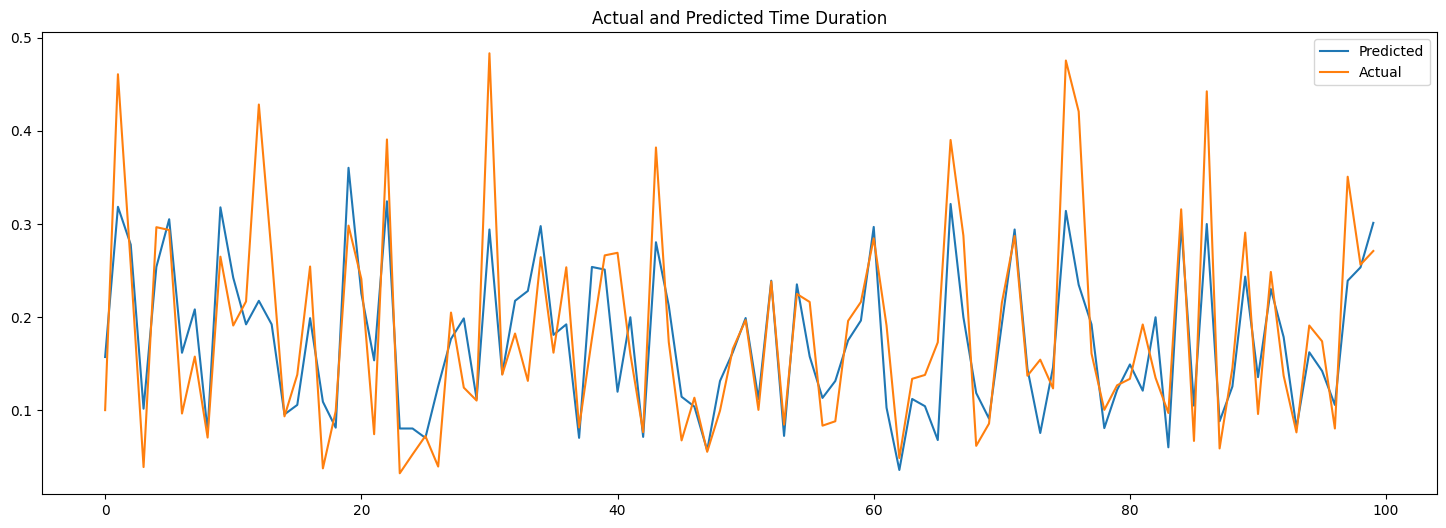

In [67]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_decision_tree_train)

Mean Squared Error: 0.0049 Root Mean Squared Error: 0.06999999999999999
R2 Score : 0.5471424276844363 Adjusted R2 Score : 0.5467798334214604


(0.0049, 0.06999999999999999, 0.5471424276844363, 0.5467798334214604)

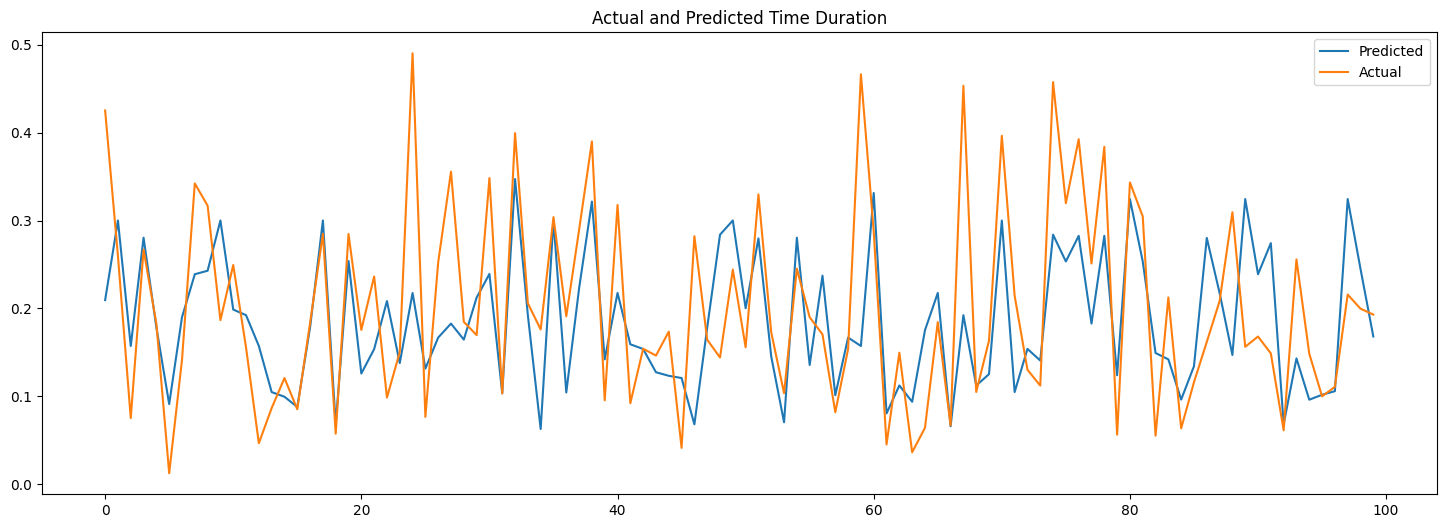

In [68]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_pred_decision_tree_test)

### This algorithm is better than the previous one (linear regression) but still the accuracy score is low (58%)

## **Model 3 - XG Boost**

In [69]:
# Number of trees
total_estimators = [50,100,120]

# Maximum depth of trees
max_depth_of_trees = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# Hyperparameter Grid
param_xgboost = {'total_estimators' : total_estimators,
              'max_depth' : max_depth_of_trees,
             'min_samples_split':min_samples_split
              }

In [70]:
# Instantiate  XGBRegressor
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()

# Grid search
xgboost_grid = GridSearchCV(estimator=xgboost_model,param_grid = param_xgboost,cv = 3, verbose=2,scoring="r2")

xgboost_grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[15:48:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split", "total_estimators" } are not used.

[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   7.6s
[15:49:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split", "total_estimators" } are not used.

[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   5.8s
[15:49:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split", "total_estimators" } are not used.

[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   8.3s
[15:49:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split", "total_estimators" } are not used.

[CV] END max_depth=5, min_samples_split=40, total_estimators=100; total time=   7.7s
[15:49:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split", "total_estimators" } are not used.

[CV] END max_depth=5, min_s

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'total_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [71]:
xgboost_grid.best_score_

0.5995439944816102

In [72]:
xgboost_grid.best_params_

{'max_depth': 5, 'min_samples_split': 40, 'total_estimators': 50}

In [73]:
xgboost_optimal_model =xgboost_grid.best_estimator_

In [74]:
y_pred_xgboost_test=xgboost_optimal_model.predict(x_test)
y_pred_xgboost_train=xgboost_optimal_model.predict(x_train)

Mean Squared Error: 0.0039 Root Mean Squared Error: 0.06244997998398398
R2 Score : 0.648323987900888 Adjusted R2 Score : 0.6482536377490609


(0.0039, 0.06244997998398398, 0.648323987900888, 0.6482536377490609)

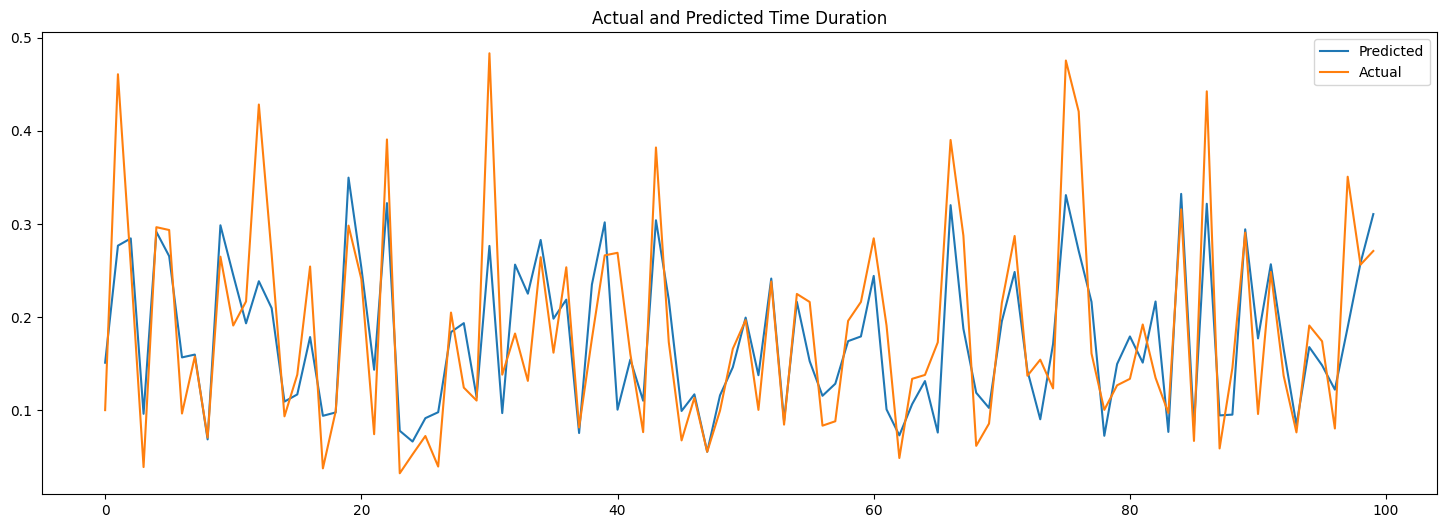

In [75]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_xgboost_train)

Mean Squared Error: 0.0043 Root Mean Squared Error: 0.06557438524302
R2 Score : 0.6008898657026871 Adjusted R2 Score : 0.600570305969476


(0.0043, 0.06557438524302, 0.6008898657026871, 0.600570305969476)

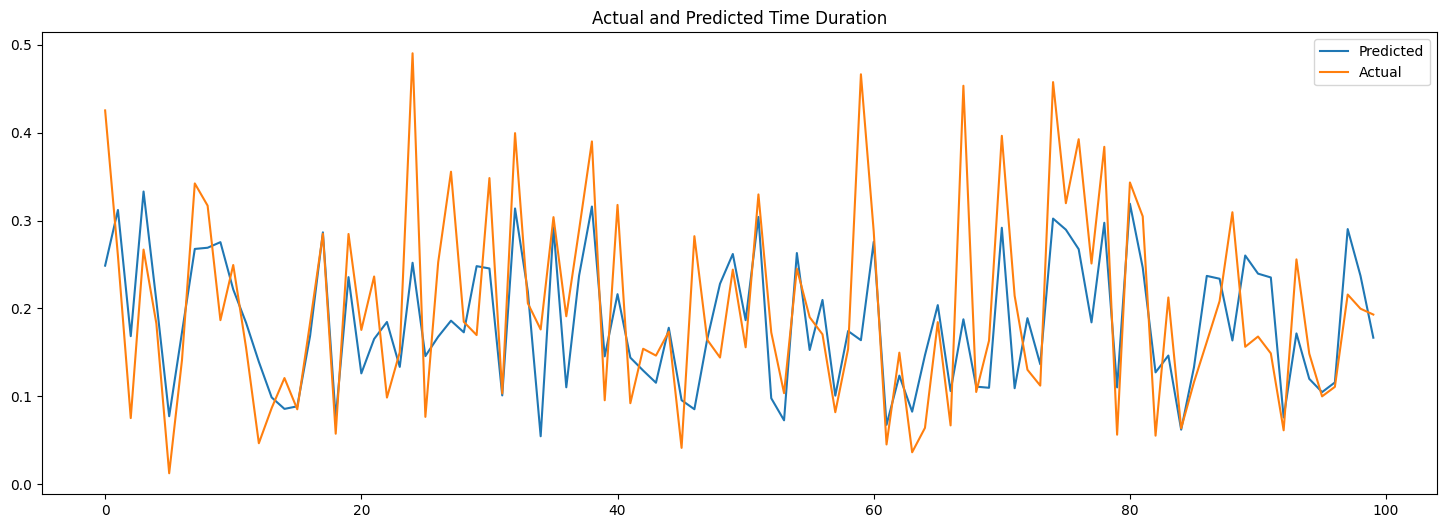

In [76]:
# Evaluation metrics for Test set
EM(x_test,y_test,y_pred_xgboost_test)

### This algorithm has given the best accuracy score till now (71%) with low MSE score.

## **Model 4 - Gradient Boost**

In [77]:
# Number of trees
gradient_boost_estimators = [100]

# Maximum depth of trees
maximum_depth_gb = [5,8,10]

# Minimum number of samples required to split a node
minimum_samples_split_gb = [50,80]

# Minimum number of samples required at each leaf node
minimum_samples_leaf_gb = [40,50]

# HYperparameter Grid
param_gradient_boost = {'N_estimators' : gradient_boost_estimators,
              'maximum_depth_gb' : maximum_depth_gb,
              'minimum_samples_split_gb' : minimum_samples_split_gb,
              'minimum_samples_leaf_gb' : minimum_samples_leaf_gb}

In [78]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor()
gradient_boost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [79]:
y_preds_gradient_boost_test = gradient_boost_model.predict(x_test)
y_pred_gradient_boost_train=gradient_boost_model.predict(x_train)

Mean Squared Error: 0.0047 Root Mean Squared Error: 0.06855654600401044
R2 Score : 0.5719978570834632 Adjusted R2 Score : 0.5719122384609225


(0.0047, 0.06855654600401044, 0.5719978570834632, 0.5719122384609225)

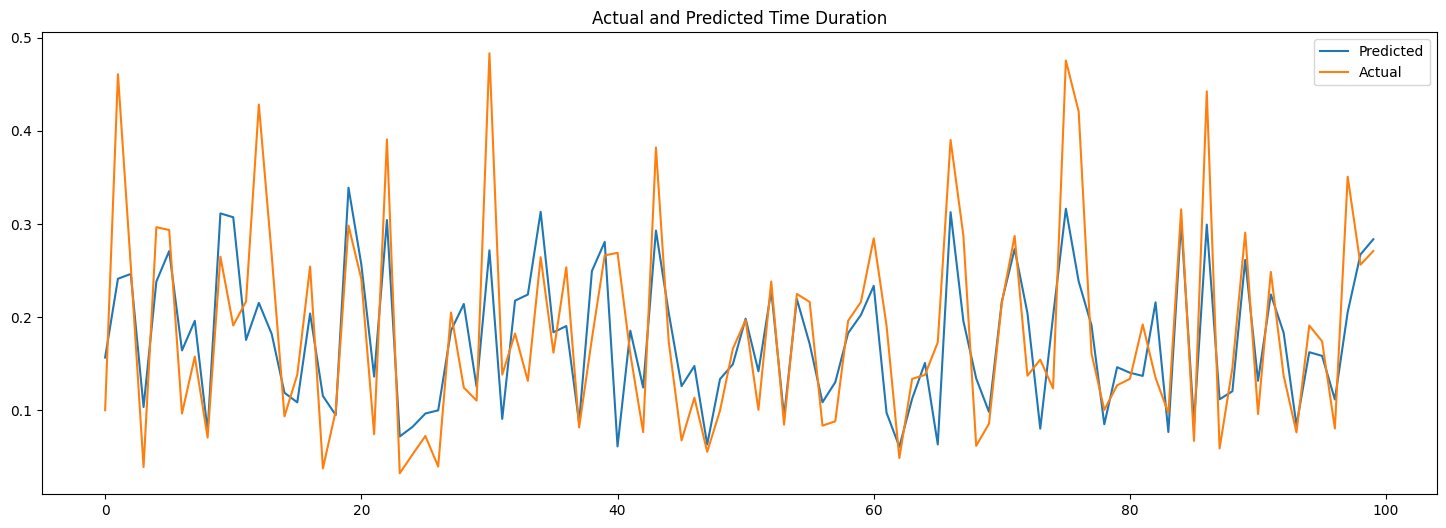

In [80]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_gradient_boost_train)

### Above algorithm has an accuracy score of 57% which is lower that our previous algorithm (XG Boost)

Mean Squared Error: 0.0047 Root Mean Squared Error: 0.06855654600401044
R2 Score : 0.5636976705125473 Adjusted R2 Score : 0.563348331710976


(0.0047, 0.06855654600401044, 0.5636976705125473, 0.563348331710976)

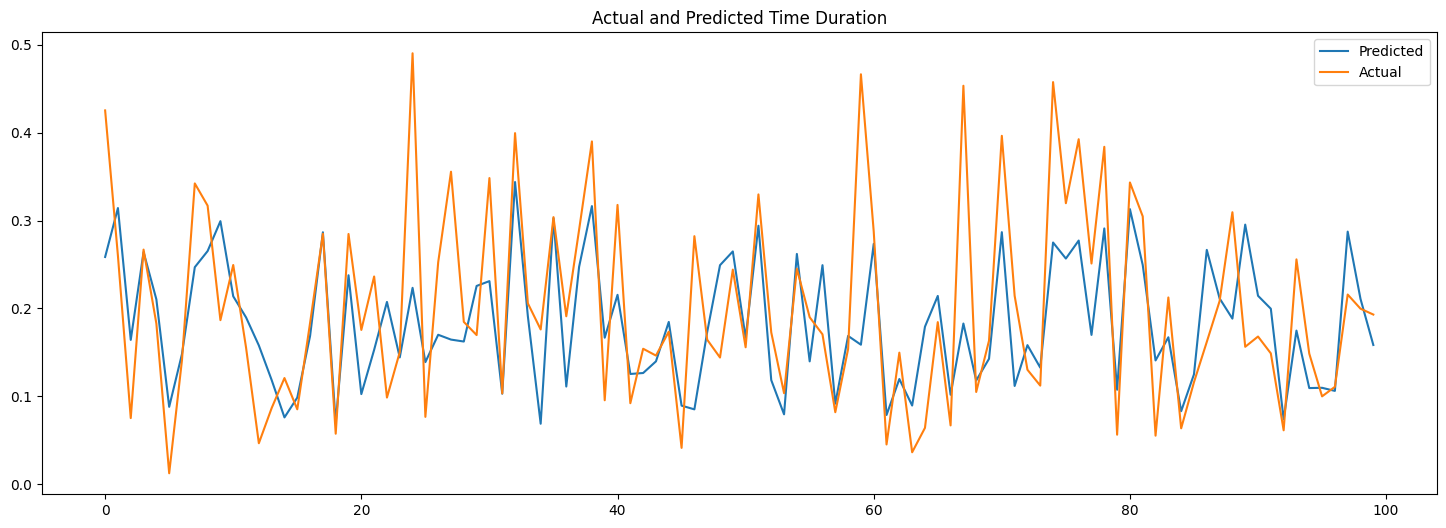

In [81]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_preds_gradient_boost_test)

## **Model 5 - Random Forest Regression**

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest objects
random_forest_model = RandomForestRegressor(criterion = 'squared_error', n_estimators = 10 , max_depth = 10)
random_forest_model.fit(x_train,y_train)
y_preds_random_forest_test = random_forest_model.predict(x_test)
y_pred_random_forest_train=random_forest_model.predict(x_train)


Mean Squared Error: 0.0043 Root Mean Squared Error: 0.06557438524302
R2 Score : 0.6128260659268918 Adjusted R2 Score : 0.6127486146816876


(0.0043, 0.06557438524302, 0.6128260659268918, 0.6127486146816876)

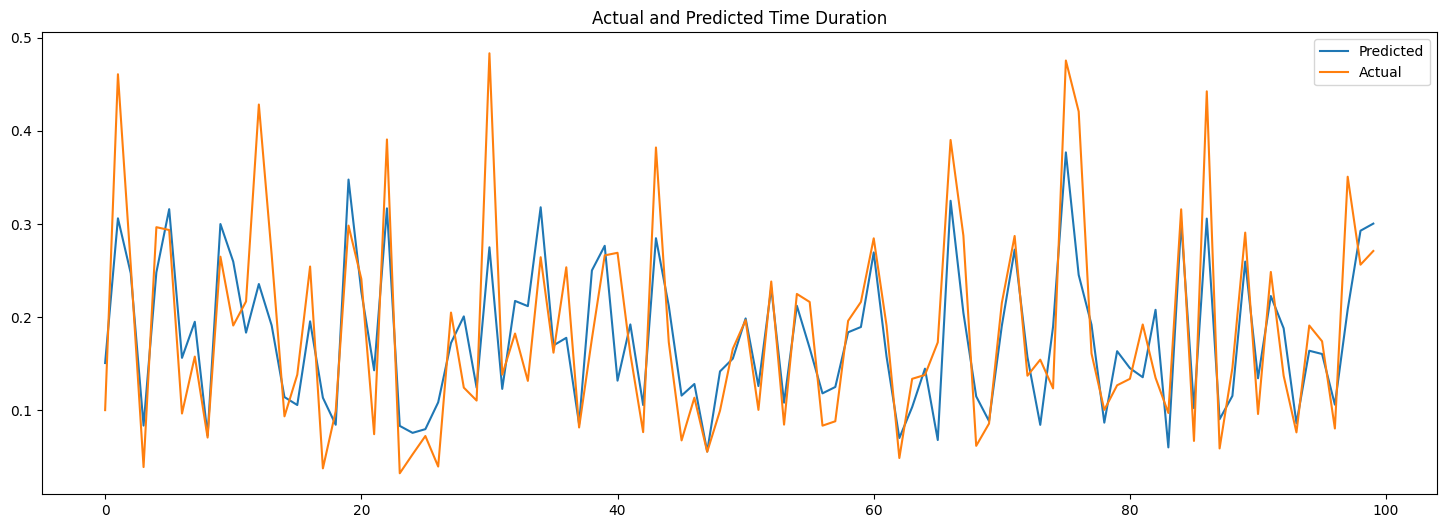

In [87]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_random_forest_train)

Mean Squared Error: 0.0047 Root Mean Squared Error: 0.06855654600401044
R2 Score : 0.5657986897148353 Adjusted R2 Score : 0.5654510331585343


(0.0047, 0.06855654600401044, 0.5657986897148353, 0.5654510331585343)

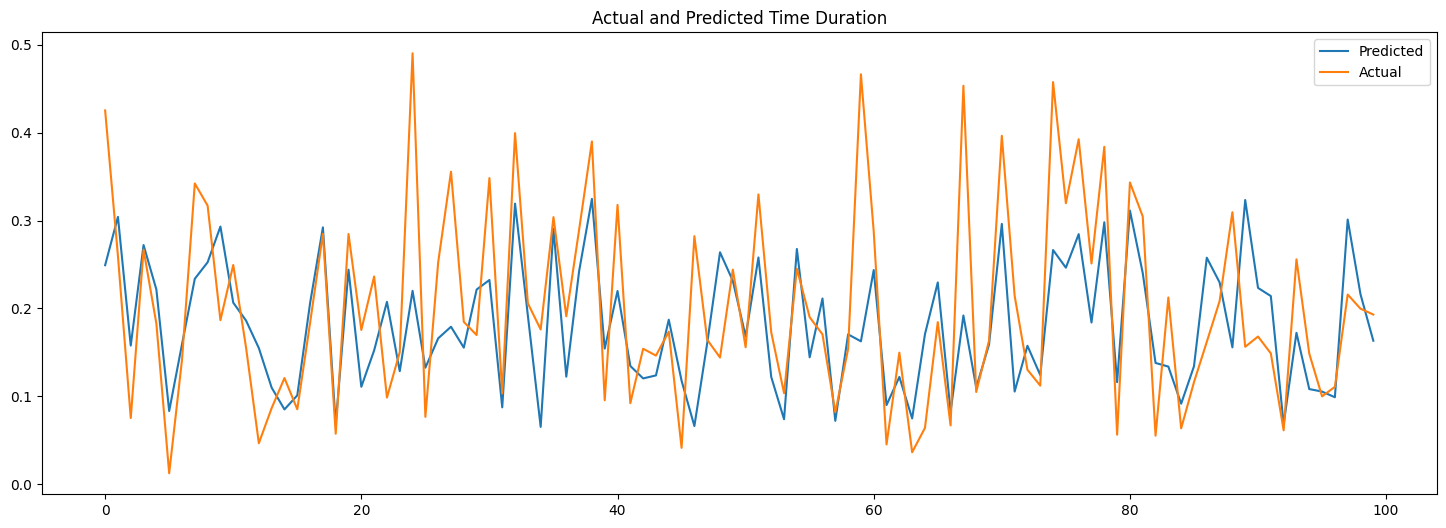

In [88]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_preds_random_forest_test)

### This algorithm has performed a little better that the previous one (accuracy score:61%) but has still not surpassed XG Boost algorithm's accuracy.

## **STEP 9 - Comparing evaluation metrics of different models**

### Creating a new dataframe containing alll the values of evaluation metrics for all the above models and creating visually appealing insights

In [89]:
# initialize list of lists
data = [[0.0056, 0.07483314773547883, 0.4928134668452804, 0.49271200797864023], [0.0046, 0.06782329983125268, 0.583740252123725, 0.5836569824793504],
        [0.0031, 0.055677643628300216, 0.7191718076114904, 0.7191156300352777], [0.0047, 0.06855654600401044, 0.5719978570834632, 0.5719122384609225], [0.0043, 0.06557438524302, 0.6123412519345506, 0.6122637037059389]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['MSE', 'RMSE', 'R2', 'AdR2'], index=['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost', 'Random Forest'])
df

,MSE,RMSE,R2,AdR2
Linear Regression,0.0056,0.074833,0.492813,0.492712
Decision Tree,0.0046,0.067823,0.583740,0.583657
XgBoost,0.0031,0.055678,0.719172,0.719116
Gradient Boost,0.0047,0.068557,0.571998,0.571912
Random Forest,0.0043,0.065574,0.612341,0.612264


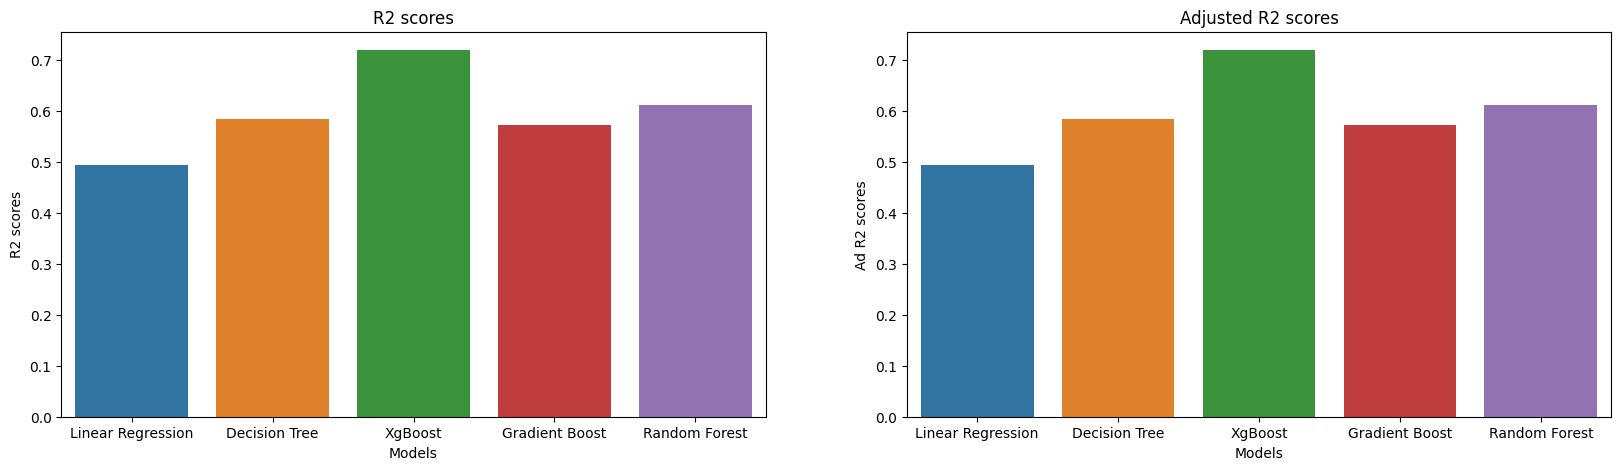

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost', 'Random Forest']
# Pickup by month count
ax1.set_title('R2 scores')
ax = sns.barplot(x = x_, y='R2', data = df, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('R2 scores')

# Droppoff by month count
ax = sns.barplot(x = x_, y='AdR2',  data = df, ax = ax2)
ax2.set_title('Adjusted R2 scores')
ax.set_xlabel('Models')
ax.set_ylabel('Ad R2 scores')
plt.show()

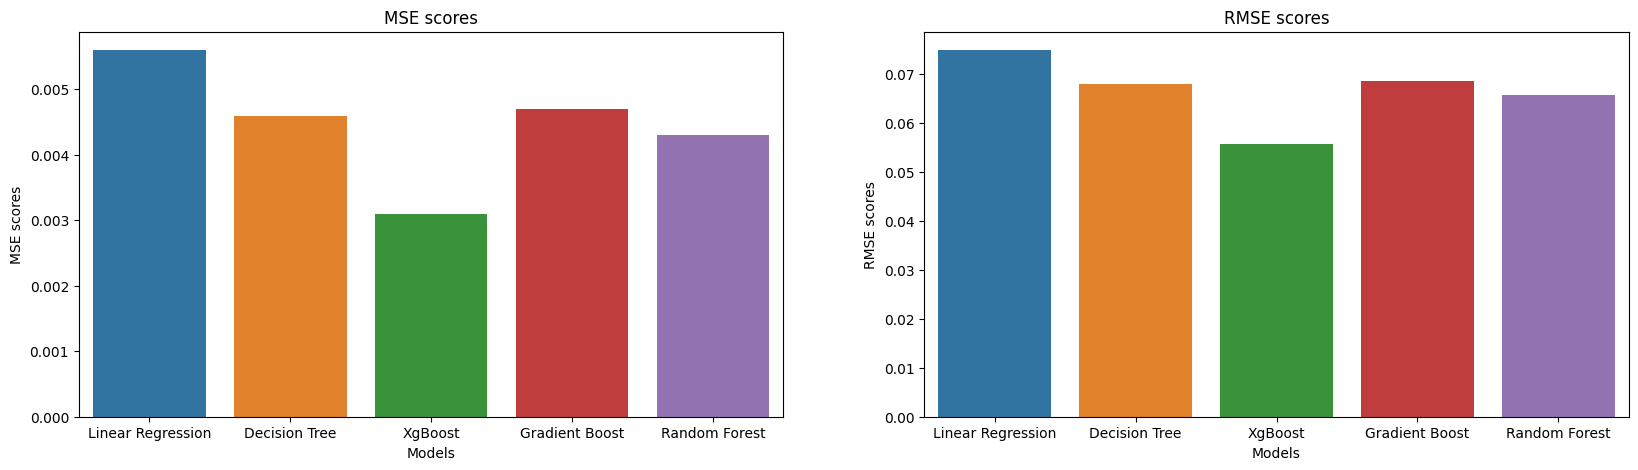

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost', 'Random Forest']
# Pickup by month count
ax1.set_title('MSE scores')
ax = sns.barplot(x = x_, y='MSE', data = df, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('MSE scores')

# Droppoff by month count
ax = sns.barplot(x = x_, y='RMSE',  data = df, ax = ax2)
ax2.set_title('RMSE scores')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE scores')
plt.show()

# **Conclusion for EDA:**


*   Vendor id distribution shows Vendor 2 recieves more number of bookings
*   Store_and_ fwd_flag Count shows that majority of the time the taxi driver hasn't logged onto the vendor's systems.

*   Distribution of pickups and dropoffs on daily basis interprets that we can see that compared to other days, taxi booking rates are higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.
*   Distribution of pickups and dropoffs on monthly basis shows that taxi reservations were more in the month of March and April.

*  Monthly trend for vendors tells us that both  vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June.
*   Distribution of pickups and dropoffs on hourly basis gives us the insight that people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

*  Passenger count distribution shows that most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo


# **Conclusion for Model Training:**


*   Initially in the feature engineering part we added a column called speed but unfortunately we had to remove it because of its high correlation with distance column and trip duration column. Because of this high collinearity we got accuracy of the models around 99% (false results/predictions). so we removed it.
*   There were a lot of outliers in our variables some values were near to zero, we tried to remove those values but we found that we were losing a lot of data.
 we trained our model using various algorithms and we got an accuracy of 71%.

*   we were curious whether the model was overfit or not, hopefully it was not, as it gave pretty much similar results for train and test data in all the algorythms tried.
*   In all the above model's graph we saw that actual and predicted values are almost near to each other (lines coinciding) in only 2 models namely: **XG Boost** and **Random Forest**.
 **R2 scores** were also **high** for the above two models and **MSE scores** were also **low** in these models which satisafies the requirements of a good model.

*   ### So we came to a conclusion that removing data removes a lot of information, new column if highly collinear can give pseudo good results,also we got our best R2 score from XG Boost model,we tried taking an optimum parameter so that our model doesnt overfit.








  
   





    
    










